## Task 2

In [1]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('task2.txt', sep='\t')

In [3]:
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


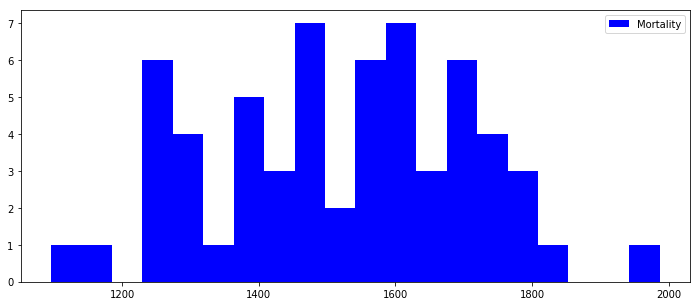

In [47]:
pylab.hist(data['mortality'], bins = 20, color = 'b', label = 'Mortality')
pylab.legend()

In [74]:
mean = data['mortality'].mean()
std = data['mortality'].std(ddof=1)
n = len(data['mortality'])
z = 1.95996
interval = z * std / sqrt(n)
                          
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
print ("sgd model mean auc 95%% confidence interval", _tconfint_generic(mean, std / sqrt(n),
                                                                       n - 1,
                                                                       0.05, 'two-sided'))

sgd model mean auc 95%% confidence interval (1476.0833413552848, 1572.2117406119285)


In [62]:
print (interval)

47.09494141911665


In [63]:
low_edge = mean - interval
top_edge = mean + interval
print ('[{0}, {1}]'.format(low_edge,top_edge))

[1477.05259956449, 1571.2424824027232]


## Task 3

Вопрос 3
На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [17]:
data3 = data[data.location == 'South']

In [18]:
data3.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


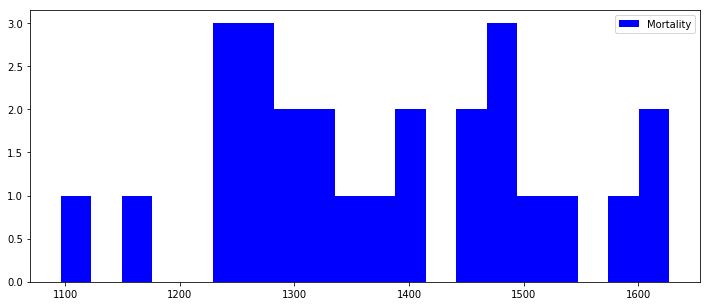

In [29]:
pylab.hist(data3['mortality'], bins = 20, color = 'b', label = 'Mortality')
pylab.legend()

In [76]:
z = 1.95996
mean = data3['mortality'].mean()
std = sqrt(data3['mortality'].std(ddof=1))
n = len(data3['mortality'])
print (mean)
print (std)
print (n)

interval3 = z * (std / sqrt(n))

low_edge = mean - interval3
top_edge = mean + interval3
print ('[{0}, {1}]'.format(low_edge,top_edge))

print ("sgd model mean auc 95%% confidence interval", _tconfint_generic(mean, std / sqrt(n),
                                                                       n - 1,
                                                                       0.05, 'two-sided'))

1376.8076923076924
11.84352883632497
26
[1372.2552792964923, 1381.3601053188925]
sgd model mean auc 95%% confidence interval (1372.0239874848273, 1381.5913971305574)


## Task 4

In [36]:
data4 = data[data.location == 'North']
z = 1.96
mean = data4['mortality'].mean()
std = data4['mortality'].std(ddof=1)
n = len(data4['mortality'])
print (mean)
print (std)
print (n)

interval4 = z * (std / sqrt(n))

low_edge = mean - interval4
top_edge = mean + interval4
print ('[{0}, {1}]'.format(low_edge,top_edge))

1633.6
136.93691119292424
35
[1588.2327372553602, 1678.9672627446396]


## Task 5

In [40]:
z = 1.96
mean = data3['hardness'].mean()
std = data3['hardness'].std(ddof=1)
n = len(data3['hardness'])
interval3 = z * (std / sqrt(n))

low_edge = mean - interval3
top_edge = mean + interval3
print ('[{0}, {1}]'.format(low_edge,top_edge))

mean = data4['hardness'].mean()
std = data4['hardness'].std(ddof=1)
n = len(data4['hardness'])
interval4 = z * (std / sqrt(n))

low_edge = mean - interval4
top_edge = mean + interval4
print ('[{0}, {1}]'.format(low_edge,top_edge))

[54.25508424908598, 85.28337728937557]
[21.741629986301252, 39.05837001369875]


## Task 5

In [51]:
# np.ceil((stats.norm.ppf(1-0.05/2) / 0.1)**2)

## TASK 2 - test 2

In [78]:
n = 50
mean = 49 / 50

s = 0
for i in range(49):
    s += (mean - 1)**2
s += (mean - 0)**2
std = sqrt(1 / (n - 1) * s)
print (std)

0.1414213562373095


In [79]:
print (mean - (1.96 * std / sqrt(n)))

0.9408


In [80]:
from statsmodels.stats.proportion import proportion_confint

In [95]:
wilson_interval = proportion_confint(1, n, method = 'wilson')

In [96]:
print ('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.003539, 0.104954] with width 0.101415


In [87]:
p = 1/50
r = p - 1.96 * sqrt(p*(1-p)/50)

In [88]:
print (r)

-0.018806020151517725


In [94]:
from statsmodels.stats.proportion import proportion_confint
normal_interval = proportion_confint(1, 50, method = 'normal')
print ('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [-0.018805, 0.058805] with width 0.077611


In [103]:
print ((1.96**2*0.02*0.98)/(0.01**2))

from statsmodels.stats.proportion import samplesize_confint_proportion
from math import ceil
ceil(samplesize_confint_proportion(1.0/50, 0.01, method='normal'))


752.9535999999999


753

In [114]:
k = np.arange(0,1,0.01)
l = [((1.96**2*p*(1-p))/(0.01**2)) for p in k]
print (l)
print (k)

[0.0, 380.31839999999994, 752.9535999999999, 1117.9055999999998, 1475.1743999999999, 1824.76, 2166.6623999999993, 2500.8815999999993, 2827.4175999999998, 3146.2703999999994, 3457.4399999999996, 3760.9263999999994, 4056.7295999999997, 4344.8496, 4625.2864, 4898.039999999999, 5163.1104, 5420.497599999999, 5670.201599999999, 5912.2224, 6146.56, 6373.214399999999, 6592.185599999999, 6803.4736, 7007.078399999999, 7202.999999999999, 7391.238399999999, 7571.793599999999, 7744.665599999998, 7909.854399999997, 8067.359999999999, 8217.1824, 8359.3216, 8493.777599999998, 8620.550399999998, 8739.639999999998, 8851.0464, 8954.769599999998, 9050.8096, 9139.166399999998, 9219.839999999998, 9292.830399999999, 9358.1376, 9415.7616, 9465.7024, 9507.96, 9542.5344, 9569.4256, 9588.6336, 9600.158399999998, 9603.999999999998, 9600.158399999998, 9588.6336, 9569.425599999999, 9542.534399999999, 9507.96, 9465.702399999998, 9415.761599999998, 9358.137599999998, 9292.830399999999, 9219.84, 9139.166399999998, 905

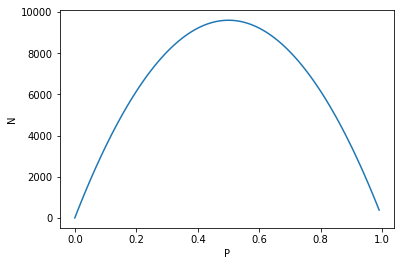

In [120]:
pylab.plot(k,l)
pylab.xlabel('P')
pylab.ylabel('N')
pylab.show()

In [121]:
from statsmodels.stats.proportion import samplesize_confint_proportion
from math import ceil
ceil(samplesize_confint_proportion(0.5, 0.01, method='normal'))

9604

## Task 6

In [11]:
import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint
import random

sample1 = np.array([1]*104+[0]*10933)
sample2 = np.array([1]*189+[0]*10845)
    
# random.shuffle(sample1,random.random)
# random.shuffle(sample2,random.random)

z = scipy.stats.norm.ppf(1 - 0.01 / 2.)
print (z)

def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(list(sample))
            
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    print (g)
    print (f)
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

print ("confidence interval: [%f, %f]" % proportions_confint_diff_rel(sample2, sample1))

2.57582930355
0
85
confidence interval: [0.006072, 0.009335]


## Task 8

In [29]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

def shance(a,b):
    return (a/b)/(1-a/b)

In [32]:
random.seed(0)

sample1 = np.array([1]*104+[0]*10933)
sample2 = np.array([1]*189+[0]*10845)

aspirin = map(lambda x:shance(sum(x),len(x)), get_bootstrap_samples(sample1, 1000))
placebo = map(lambda x:shance(sum(x),len(x)), get_bootstrap_samples(sample2, 1000))
              
aspirin = get_bootstrap_samples(sample2, 1000)
placebo = get_bootstrap_samples(sample1, 1000)
vect_ot_chanse = map(lambda x: x[1]/x[0], zip(placebo, aspirin))
print (stat_intervals(vect_ot_chanse, 0.05))


ValueError: operands could not be broadcast together with shapes (11034,) (11037,) 